<a href="https://colab.research.google.com/github/Sornambal/crop-prediction-streamlit/blob/main/Crop_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🌾 Smart Farming Dashboard for Crop Recommendation**

**🧹 1. Data Preprocessing Steps**

📁 Dataset Features:
N: Nitrogen content in soil

P: Phosphorous content in soil

K: Potassium content in soil

temperature: in Celsius

humidity: in %

ph: pH value of the soil

rainfall: in mm

label: Crop name (target)

**🔧 Preprocessing Steps:**

In [29]:
import pandas as pd
import numpy as np

In [30]:
# Load dataset
df = pd.read_csv("/content/Crop_recommendation.csv")

In [31]:
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [33]:
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [34]:
# Check for nulls
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [35]:
# Rename label to 'crop'
df.rename(columns={'label': 'crop'}, inplace=True)

In [36]:
# Ensure correct types
df['crop'] = df['crop'].astype('category')

**📊 2. Exploratory Data Analysis (EDA)**

In [37]:
df['crop'].value_counts()


,count
crop,
apple,100
banana,100
blackgram,100
chickpea,100
coconut,100
coffee,100
cotton,100
grapes,100
jute,100



**Step 1: Crop Count Distribution**

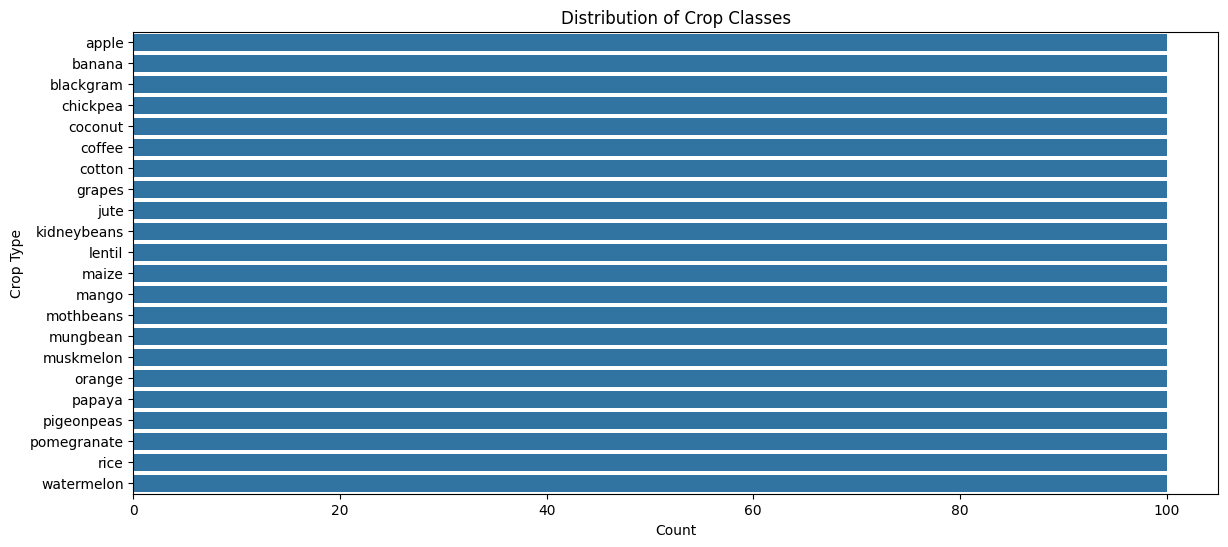

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.countplot(data=df, y='crop', order=df['crop'].value_counts().index)
plt.title("Distribution of Crop Classes")
plt.xlabel("Count")
plt.ylabel("Crop Type")
plt.show()


**Step 2: Correlation Heatmap**

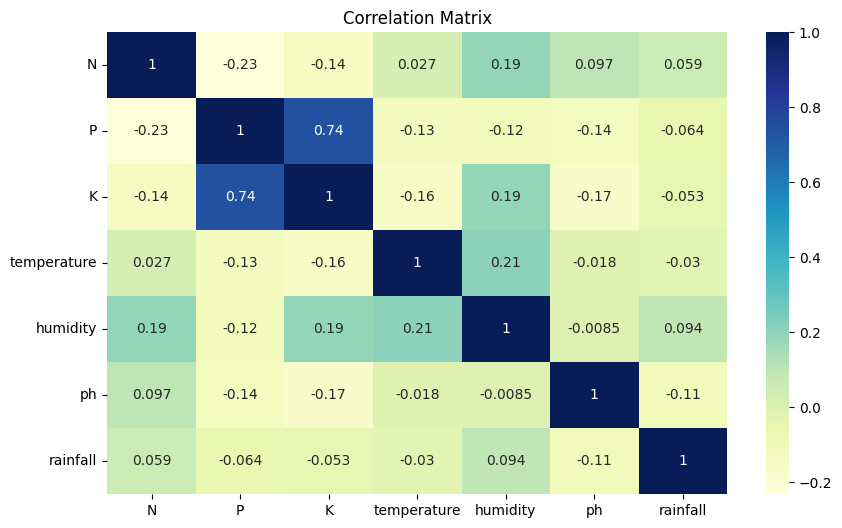

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

**Step 3: Pairplot for Key Features**

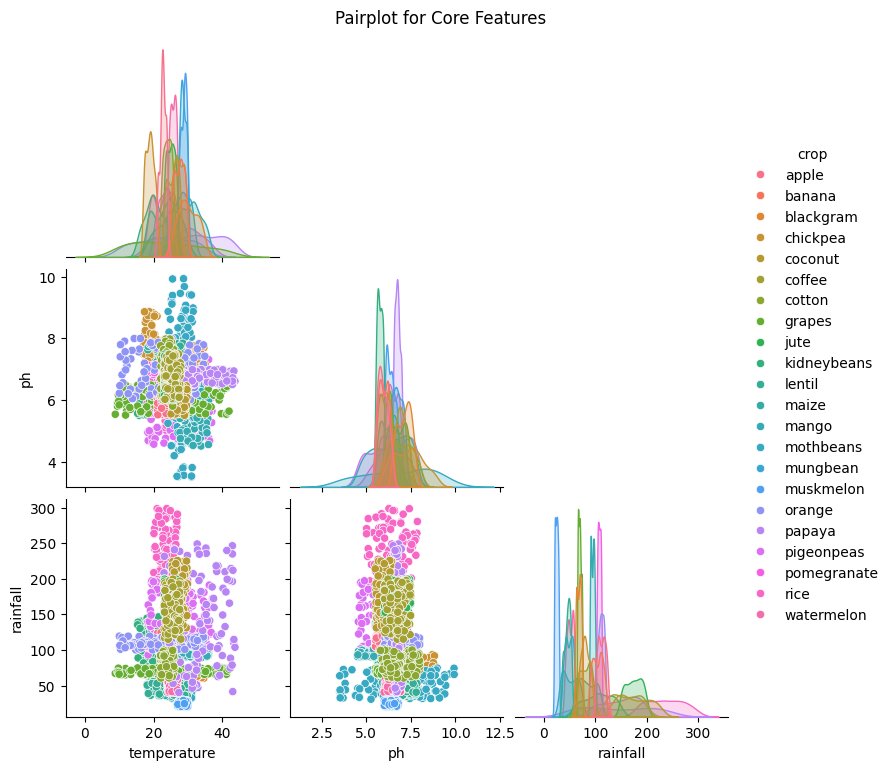

In [40]:
sns.pairplot(df[['temperature', 'ph', 'rainfall', 'crop']], hue='crop', corner=True)
plt.suptitle("Pairplot for Core Features", y=1.02)
plt.show()


**Step 4: Boxplots for Distribution Check**

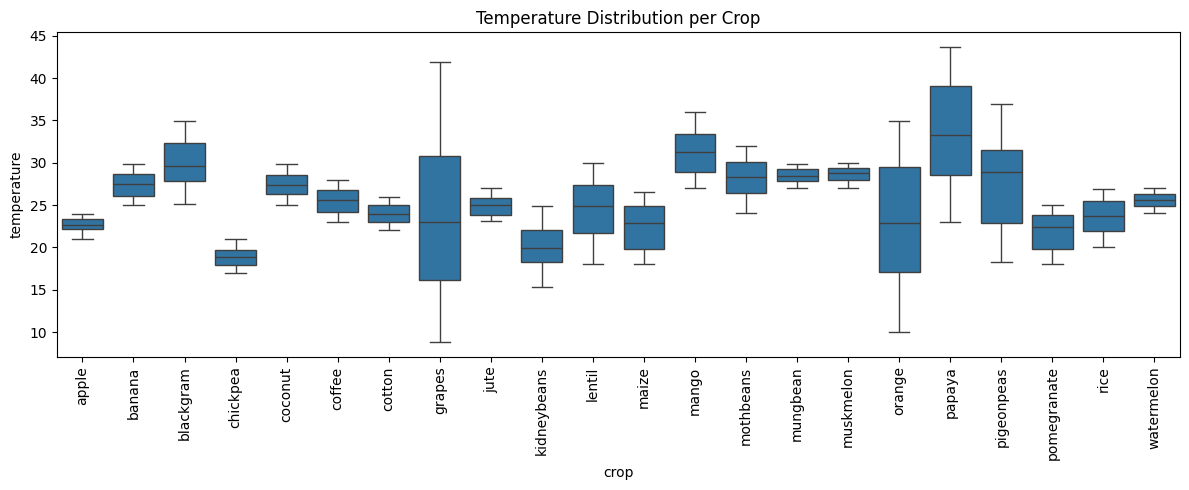

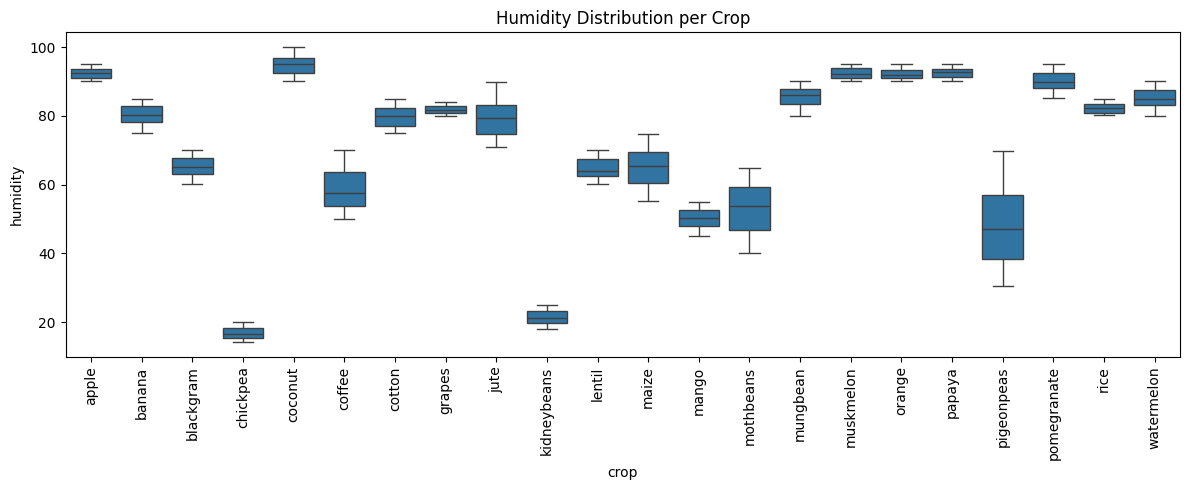

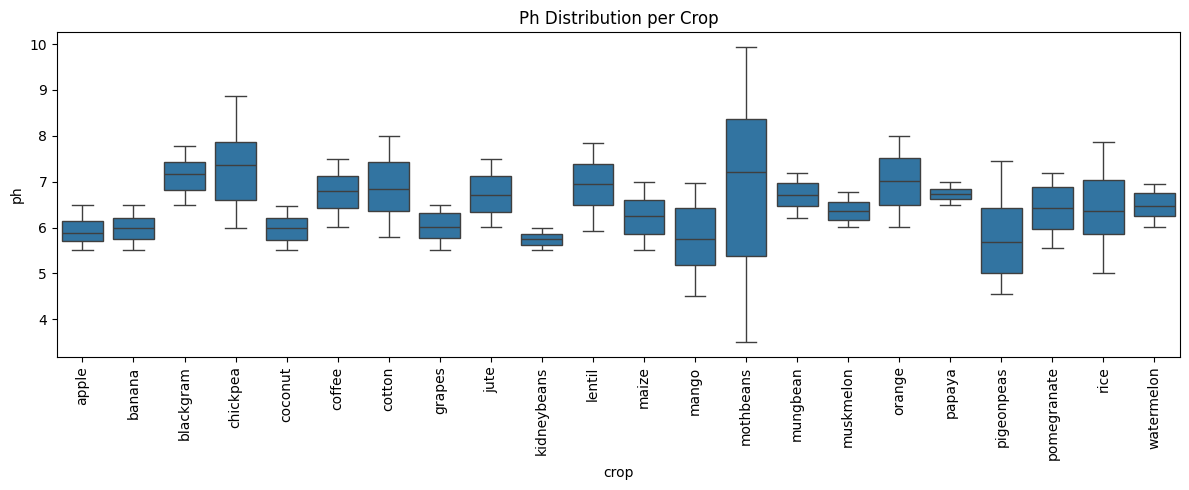

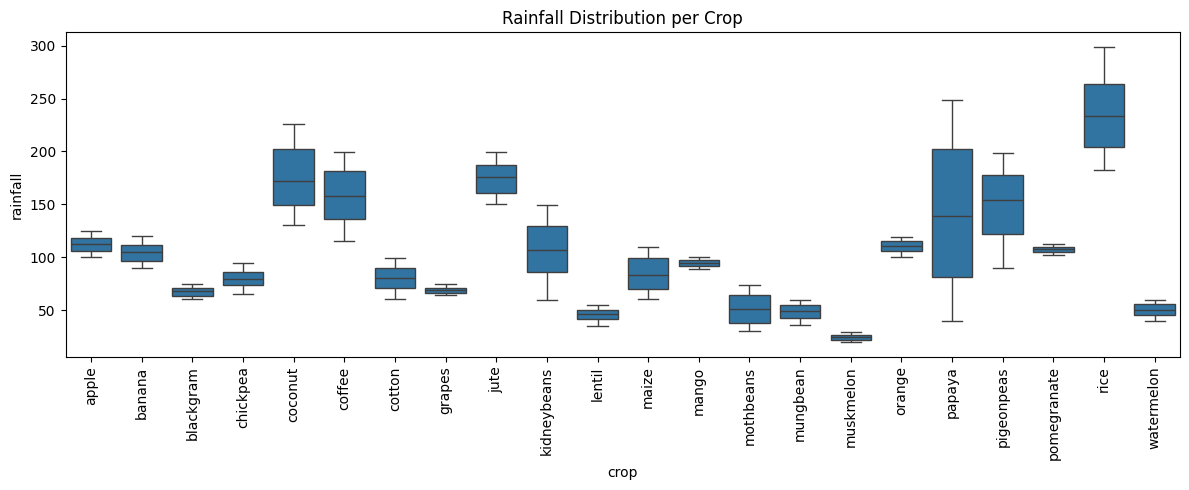

In [41]:
features = ['temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    plt.figure(figsize=(12,5))
    sns.boxplot(x='crop', y=feature, data=df)
    plt.xticks(rotation=90)
    plt.title(f"{feature.capitalize()} Distribution per Crop")
    plt.tight_layout()
    plt.show()


**Feature Selection**

In [42]:
# Features and Target
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

y = df['crop']


**Label Encoding (Target)**

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Convert crop names to numbers

# Optional: Store mapping to decode later
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_map)


{'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


**Train-Test Split**

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


**Model Building (Random Forest)**

In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Model Evaluation**

Accuracy: 0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        2

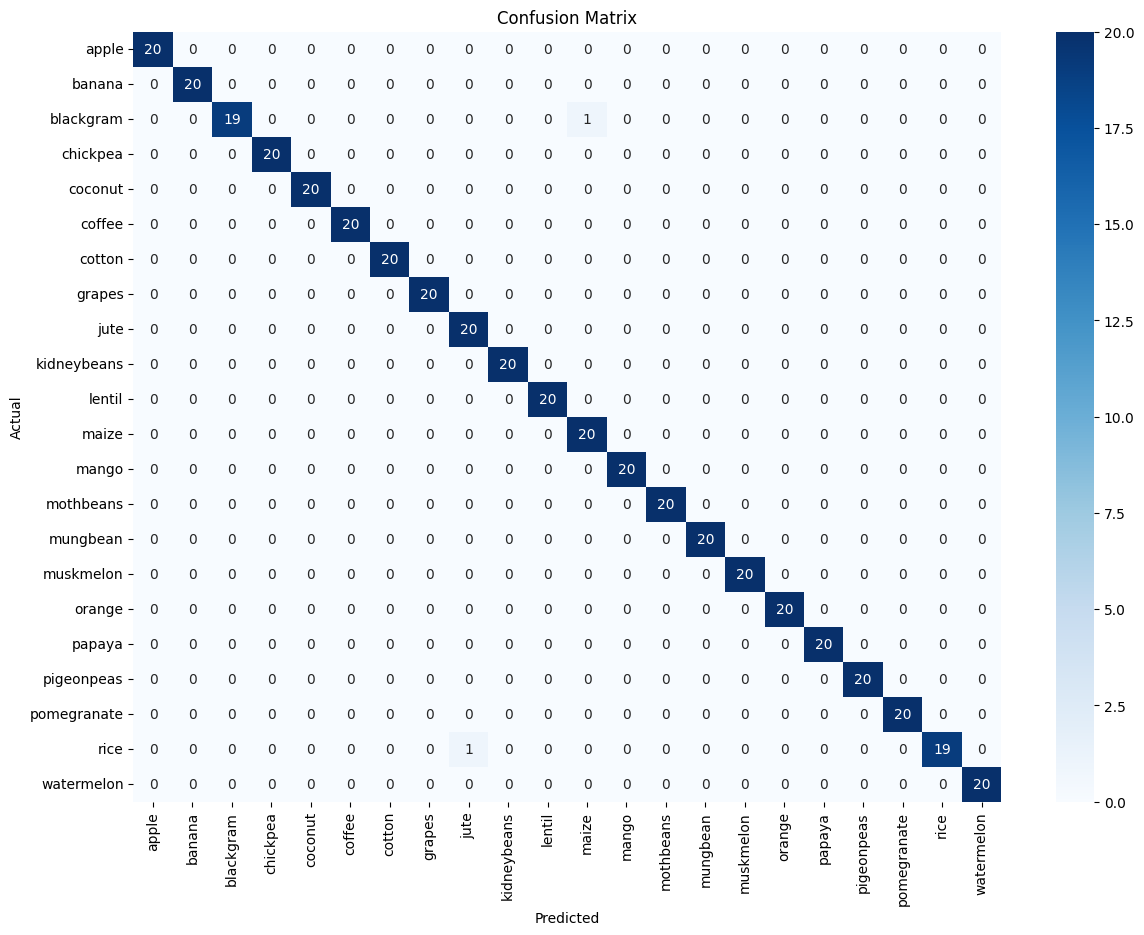

In [49]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Save Model for Deployment**

In [54]:
import os
import pickle
from sklearn.preprocessing import LabelEncoder

# Clean old files if they exist
if os.path.exists("crop_model.pkl"):
    os.remove("crop_model.pkl")

if os.path.exists("label_encoder.pkl"):
    os.remove("label_encoder.pkl")

# Save your XGBoost model (or any model)
with open("crop_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save your label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [12]:
!pip install requests streamlit geocoder


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


**Dashboard**

In [69]:
# 🔧 Write to app.py
%%writefile app.py
import streamlit as st
import numpy as np
import pickle
import requests

# 🌐 Weather API Setup
API_KEY = "72b890e0979d914834509b2506b64de9"  # 🔑 Replace with your OpenWeatherMap API key

def get_weather(city):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    data = response.json()
    if data["cod"] == 200:
        temp = data["main"]["temp"]
        humidity = float(data["main"]["humidity"])
        rainfall = float(data["rain"]["1h"]) if "rain" in data and "1h" in data["rain"] else 0.0
        return temp, humidity, rainfall
    else:
        st.warning(f"❌ Could not fetch weather for '{city}'. Error: {data.get('message', 'Unknown error')}")
        return None, None, None

# 🌾 Streamlit UI
st.set_page_config(page_title="Smart Crop Recommendation System", layout="centered")
st.title("🌾 Crop Recommendation System")

st.markdown("📍 Auto-detect **weather conditions** from your city input")
st.markdown("🧪 Please **manually enter soil nutrients and pH** based on your soil report.")

city = st.text_input("Enter City Name with Country Code (e.g., 'Coimbatore,IN')", value="Coimbatore,IN")

temperature, humidity, rainfall = None, None, None

if city:
    temperature, humidity, rainfall = get_weather(city)
    if temperature is not None:
        st.success("✅ Weather data autofilled successfully.")
    else:
        st.info("ℹ️ You can manually fill the values if auto-fetch fails.")

# 🧪 Soil and Environmental Inputs
st.markdown("### 🔢 Enter the soil values below:")
st.markdown("*You can get these from a soil testing report.*")

N = st.number_input("Nitrogen (N)", min_value=0.0, max_value=200.0, value=50.0, step=1.0)
P = st.number_input("Phosphorus (P)", min_value=0.0, max_value=200.0, value=50.0, step=1.0)
K = st.number_input("Potassium (K)", min_value=0.0, max_value=200.0, value=50.0, step=1.0)
ph = st.number_input("Soil pH", min_value=0.0, max_value=14.0, value=6.5, step=0.1)

# 🌡️ Auto-filled or manual climate data
st.markdown("### 🌦️ Auto-filled Weather Data (Editable if needed):")
temperature = st.number_input("Temperature (°C)", min_value=0.0, max_value=50.0, value=float(temperature) if temperature is not None else 25.0)
humidity = st.number_input("Humidity (%)", min_value=0.0, max_value=100.0, value=float(humidity) if humidity is not None else 70.0)
rainfall = st.number_input("Rainfall (mm)", min_value=0.0, max_value=300.0, value=float(rainfall) if rainfall is not None else 100.0)


# Load model and encoder
model = pickle.load(open("crop_model.pkl", "rb"))
label_encoder = pickle.load(open("label_encoder.pkl", "rb"))

# 🔮 Predict Button
if st.button("Predict Crop"):
    user_input = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction_encoded = model.predict(user_input)[0]
    prediction_label = label_encoder.inverse_transform([prediction_encoded])[0]
    st.success(f"✅ Recommended Crop: **{prediction_label.upper()}**")


Overwriting app.py


In [20]:
!pip install streamlit pyngrok --quiet


In [16]:
!pkill -f streamlit
!pkill -f ngrok


In [17]:

# Step 3: Remove old model/encoder duplicates (optional cleanup)
import os
for f in os.listdir():
    if '(1)' in f:
        os.remove(f)

In [65]:

# Kill previous tunnels
ngrok.kill()


In [66]:
!streamlit run app.py &> /dev/null &

In [67]:
from pyngrok import ngrok
ngrok.set_auth_token("30MIODSCyjuLSL3zKGjDtnntIoG_7hxohbK2MwU7sV9DDW2vt")

In [68]:
public_url = ngrok.connect(8501)
print(f'🔗 Public URL to access your Streamlit app: {public_url}')

🔗 Public URL to access your Streamlit app: NgrokTunnel: "https://f11434e488a5.ngrok-free.app" -> "http://localhost:8501"
